In [1]:
from tilepy.include.ObservationScheduler import GetUniversalSchedule
from tilepy.include.PointingTools import ObservationParameters, NextWindowTools
import time
import datetime
import argparse
import os

/Users/md274436/software/miniforge3/envs/tilepy/lib/python3.11/site-packages/ligo/lw/lsctables.py:89: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal
/Users/md274436/software/miniforge3/envs/tilepy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Type of followup, options: gbm, gbmpng or gw
alertType = 'gw'

# The url to the FITS file with the sky localization, e.g.for GW https://urlpath/Bayestar.fits.gz'
skymap = 'https://gracedb.ligo.org/api/superevents/S190728q/files/GW190728_064510_PublicationSamples_flattened.fits.gz,0'

# Date and time of the event in format YYYY-MM-DD HH:MM:SS. You can use 2023-07-15 14:30:10 for the example .fits file
obsTime = datetime.datetime.fromisoformat("2023-07-27T08:30:10")

# Path to the input datasets (where galaxy cat should be for GW case)
datasetDir = '../../dataset/'

# Path to the output folder
outDir = './output'

# Config file for the tiling scheduling
#cfgFile = '../obsConfig/FollowupParameters.ini'

# Galaxy catalog name (if no catalog is given, the approach will be 2D) only. Path is given in datasetDir 
galcatName = "../../tilepy/dataset/Gladeplus.h5"

# Tiles already observed
pointingsFile = None


In [3]:
ObsArray = ['LST','MAGIC']
parameters = []

In [4]:
# Config file for the tiling scheduling
for i in ObsArray:
    parameters.append("../config/FollowupParameters_%s.ini" % i)
print("===========================================================================================")
print('parameters', parameters)
obsparameters = []

parameters ['../config/FollowupParameters_LST.ini', '../config/FollowupParameters_MAGIC.ini']


In [5]:
for j in range(len(parameters)):
    obspar = ObservationParameters()
    obspar.add_parsed_args(skymap, obsTime, datasetDir, galcatName, outDir, pointingsFile, alertType)
    obspar.from_configfile(parameters[j])
    obsparameters.append(obspar)

The file is already existing, it will be re-downloaded


Starting the 2D pointing calculation with the following parameters

Filename:  undefined
Date:  2023-07-27 08:30:10
Dataset:  ../../dataset/
Output:  ./output/undefined

ObservationTime0 2023-07-27 08:30:10
obsparameters 2
The total probability PGW:  0.5423
     Time[UTC]      RA(deg)  DEC(deg)  PGW   Round ObsName Duration FoV
------------------- -------- -------- ------ ----- ------- -------- ---
2023-07-28 01:50:13 313.5938   7.6321 0.0527     1   MAGIC       15 1.0
2023-07-28 01:50:13 313.5938   7.9333 0.1627     1     LST       20 2.5
2023-07-28 02:05:13 317.1094  14.3235 0.0362     1   MAGIC       15 1.0
2023-07-28 02:10:13 317.1094  14.6317 0.1204     1     LST       20 2.5
2023-07-28 02:20:13 315.1758  11.1109 0.0285     1   MAGIC       15 1.0
2023-07-28 02:30:13 312.3633   4.1815  0.073     1     LST       20 2.5
2023-07-28 02:35:13 313.5938   11.263 0.0164     1   MAGIC       15 1.0
2023-07-28 02:50:13 319.7461  17.8961 0.0524     1     LST       20 2.5

Resulting pointings f

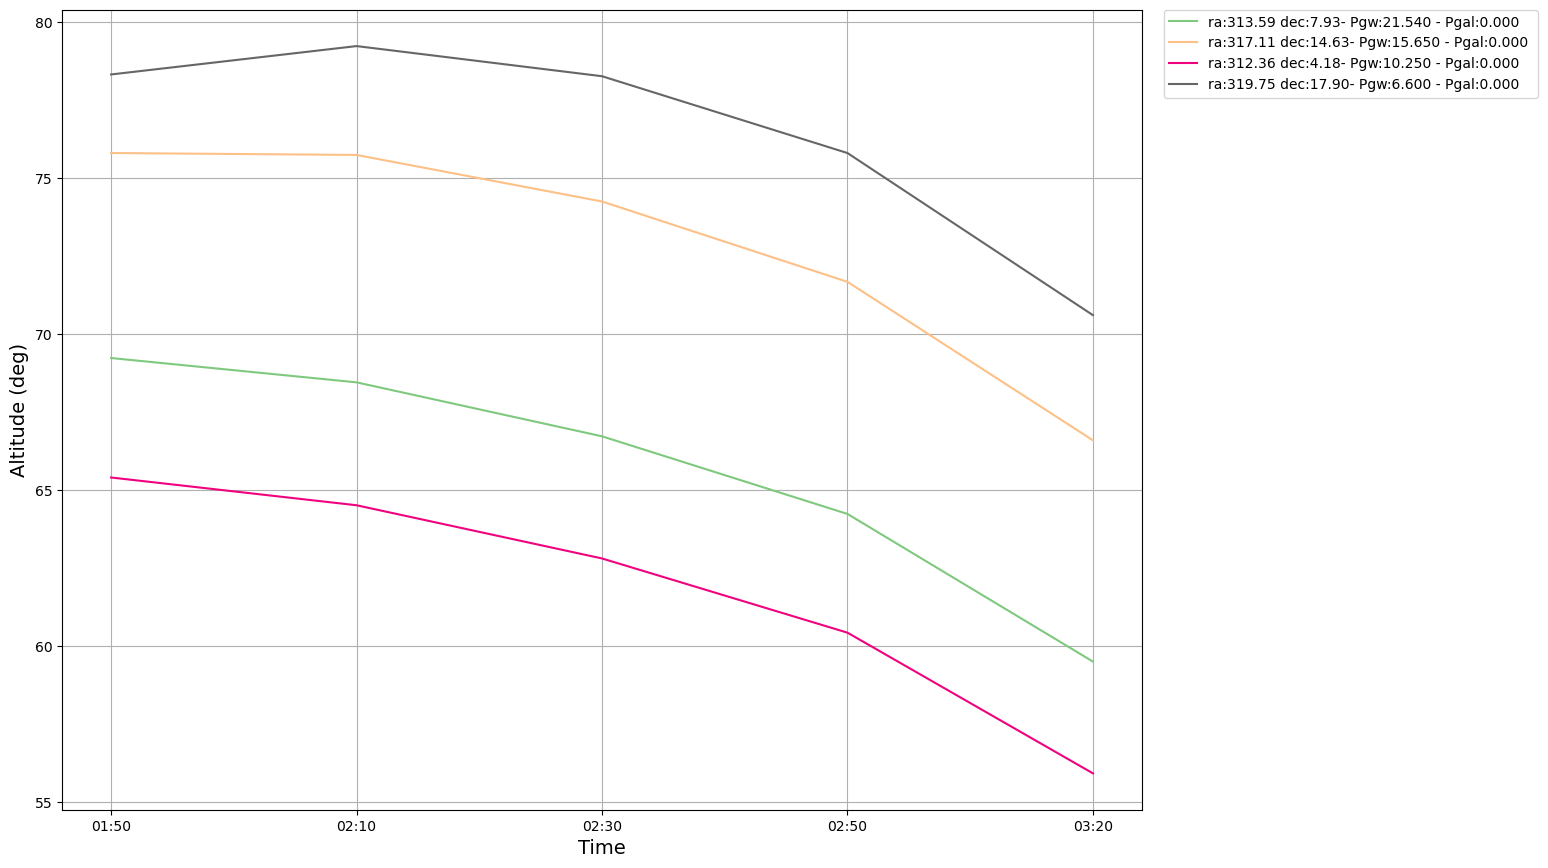

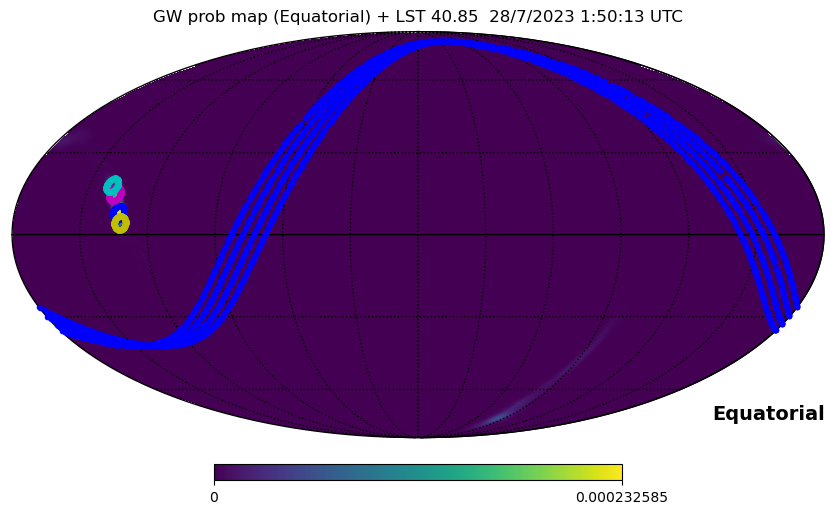

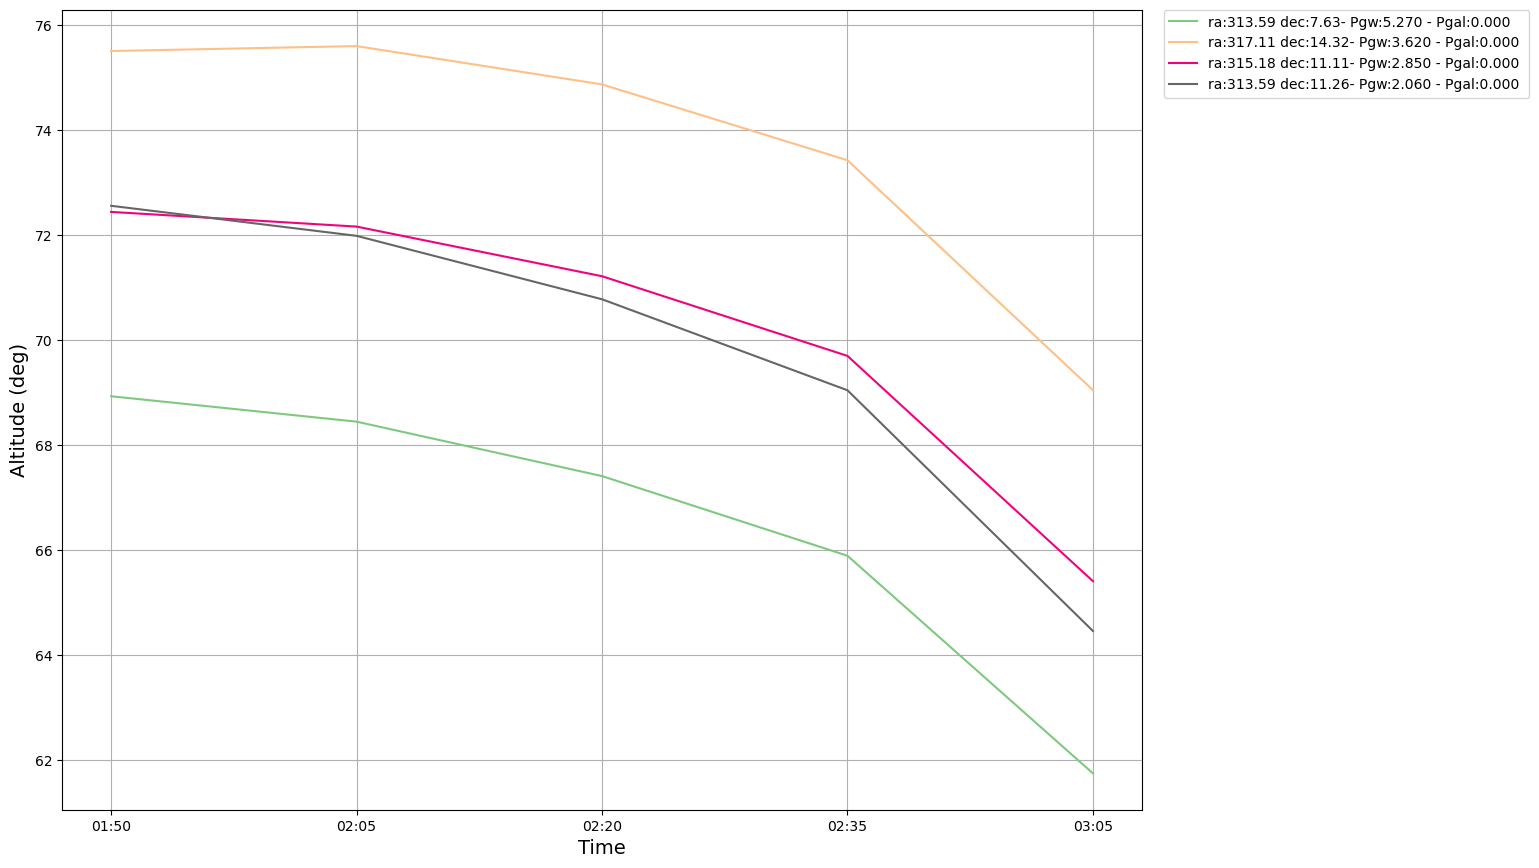

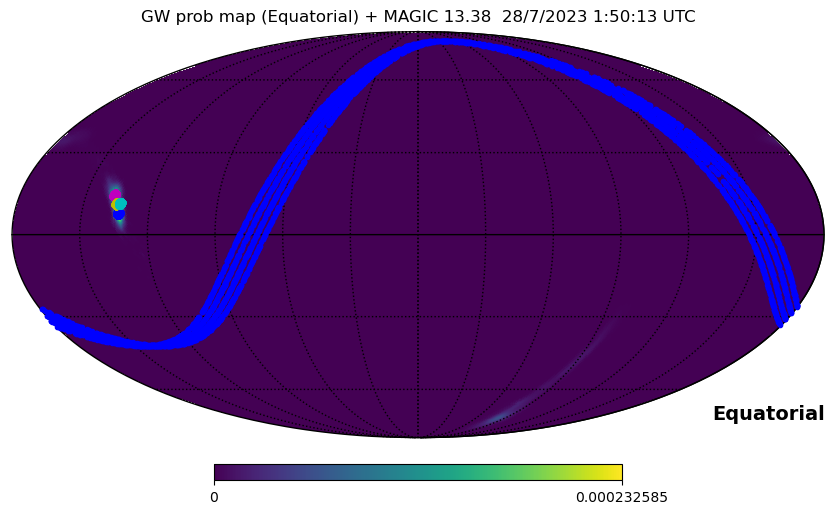

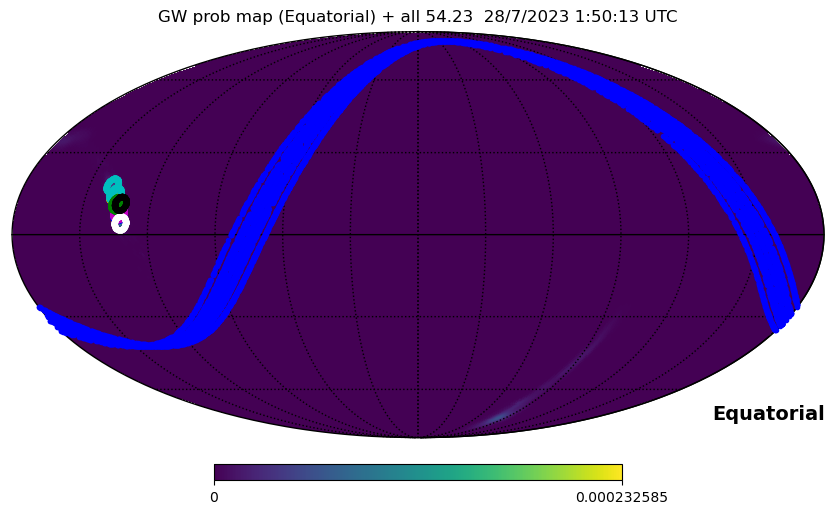

In [6]:
GetUniversalSchedule(obsparameters)